In [1]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import gc
from datetime import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from tqdm import tqdm

%matplotlib inline

%load_ext autoreload
%autoreload 2


In [2]:
# Plotting parameters
# rc('text', usetex=False)
small_size = 15
medium_size = 25
bigger_size = 30
plt.rc('font', size=small_size)          # controls default text sizes
plt.rc('axes', titlesize=small_size)    # fontsize of the axes title
plt.rc('axes', labelsize=small_size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=small_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=small_size)    # fontsize of the tick labels
plt.rc('legend', fontsize=small_size)    # legend fontsize
plt.rc('figure', titlesize=small_size)  # fontsize of the figure title
plt.rc('text', usetex = False)


# Files/folders/parameters

In [3]:
# File and folder paths
f_forcing = Path("./data/US-Bi1-forcings.csv")
f_forcing_test = Path("./data/US-Bi1-forcings-test.csv")
f_obs = Path("./data/US-Bi1-fluxes.csv")
f_obs_test = Path("./data/US-Bi1-fluxes-test.csv")

f_data = Path("./data")


# Load data

In [8]:
# Load the data
# x1, x2 = np.loadtxt(f_forcing, delimiter=','), np.loadtxt(f_forcing_test, delimiter=',')
x1, x2 = pd.read_csv(f_forcing, index_col=0), pd.read_csv(f_forcing_test, index_col=0)
y1, y2 = pd.read_csv(f_obs, index_col=0)[['LE_F_MDS', 'NETRAD', 'H_F_MDS']], pd.read_csv(f_obs_test, index_col=0)[['LE_F_MDS', 'NETRAD', 'H_F_MDS']]
# Combine the data
x = pd.concat([x1,x2])[['TA_F', 'SW_IN_F', 'eair', 'WS_F', 'CO2_F_MDS',
       'PA_F', 'USTAR', 'TS_F_MDS_4', 'SWC_F_MDS_1', 'LAI']]
y = pd.concat([y1,y2])
x.shape, y.shape

((61392, 10), (61392, 3))

In [4]:
# # Load the data
# # x1, x2 = np.loadtxt(f_forcing, delimiter=','), np.loadtxt(f_forcing_test, delimiter=',')
# x = pd.read_csv(f_forcing, index_col=0)
# y = pd.read_csv(f_obs, index_col=0)[['LE_F_MDS', 'NETRAD', 'H_F_MDS']]
# x.shape, y.shape


((35088, 14), (35088, 3))

In [10]:
x.head()

,TA_F,SW_IN_F,eair,WS_F,CO2_F_MDS,PA_F,USTAR,TS_F_MDS_4,SWC_F_MDS_1,LAI
TIMESTAMP_END,,,,,,,,,,
2018-07-01 00:00:00,18.40,0.0,0.809921,6.980,411.565,100.88,0.562560,28.603,0.07300,1.275000
2018-07-01 00:30:00,18.12,0.0,0.838017,6.329,408.403,100.88,0.532901,28.457,0.07267,1.276563
2018-07-01 01:00:00,17.32,0.0,0.885383,5.103,411.128,100.89,0.428350,28.320,0.07233,1.278125
2018-07-01 01:30:00,16.53,0.0,0.907755,4.551,411.178,100.89,0.366572,28.183,0.07200,1.279688
2018-07-01 02:00:00,15.90,0.0,0.909415,4.984,410.198,100.91,0.452048,28.043,0.07200,1.281250


In [6]:
y.head()

,LE_F_MDS,NETRAD,H_F_MDS
TIMESTAMP_END,,,
2018-07-01 00:00:00,22.8580,-79.809506,-71.6978
2018-07-01 00:30:00,20.4609,-78.913358,-69.5628
2018-07-01 01:00:00,13.7164,-77.391746,-49.3889
2018-07-01 01:30:00,10.7140,-75.324140,-36.7437
2018-07-01 02:00:00,16.0678,-74.263393,-52.0421


In [12]:
# Get the daily data
x.index, y.index = pd.to_datetime(x.index), pd.to_datetime(y.index)
x_daily = x.resample('D').mean()
y_daily = y.resample('D').mean()
x_daily

,TA_F,SW_IN_F,eair,WS_F,CO2_F_MDS,PA_F,USTAR,TS_F_MDS_4,SWC_F_MDS_1,LAI
TIMESTAMP_END,,,,,,,,,,
2018-07-01,16.983542,367.767812,0.965375,5.787750,403.475979,101.094375,0.481159,27.967292,0.074479,1.311719
2018-07-02,13.751458,305.375063,0.965088,4.611521,401.405354,101.072083,0.392931,26.912896,0.072513,1.386719
2018-07-03,13.599333,350.836313,0.918053,3.378229,403.889938,100.879792,0.295460,26.420417,0.072750,1.461719
2018-07-04,12.119188,365.762042,0.870243,3.236646,399.427938,101.335417,0.289808,26.290625,0.072271,1.512240
2018-07-05,14.917125,366.866438,0.835627,1.885583,403.976208,101.813333,0.167896,26.154438,0.072625,1.537240
...,...,...,...,...,...,...,...,...,...,...
2021-12-26,6.779688,39.578646,0.831114,3.542292,425.675271,101.612500,0.318846,9.241188,0.374007,1.236198
2021-12-27,7.628438,83.260729,0.849621,4.430250,426.527354,101.183750,0.360568,9.359250,0.378153,1.263281
2021-12-28,5.876125,91.244708,0.686653,2.221792,425.318979,101.122917,0.282230,9.033500,0.363528,1.188281


# Plot

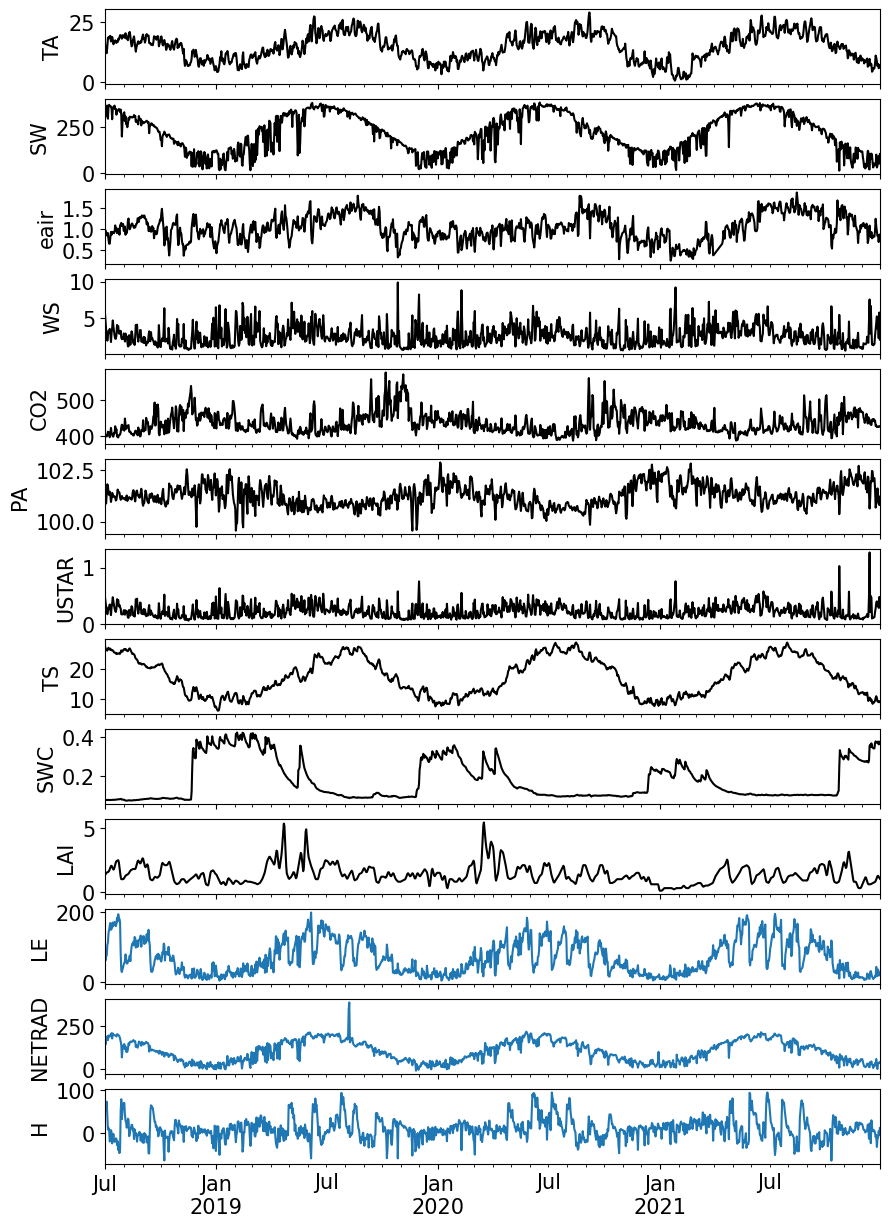

In [21]:
xvars = list(x_daily.keys())
yvars = list(y_daily.keys())
xvars_labels = ['TA', 'SW', 'eair', 'WS', 'CO2', 'PA', 'USTAR', 'TS', 'SWC', 'LAI']
yvars_labels = ['LE', 'NETRAD', 'H']

fig, axes = plt.subplots(len(xvars)+len(yvars), 1, figsize=(10,15), sharex=True)
for i,varn in enumerate(xvars):
    ax = axes[i]
    x_daily[varn].plot(ax=ax, color='black')
    ax.set(ylabel=xvars_labels[i])

for i,varn in enumerate(yvars):
    ax = axes[i+len(xvars)]
    y_daily[varn].plot(ax=ax, color='tab:blue')
    ax.set(ylabel=yvars_labels[i])

ax.set(xlabel='');
    

# Save the data

In [13]:
y_daily.to_csv(f_data / 'Output_fluxes_daily.csv')
x_daily.to_csv(f_data / 'Input_forcings_daily.csv')


In [7]:
y.to_csv(f_data / 'Output_fluxes.csv')
x.to_csv(f_data / 'Input_forcings.csv')
